# Imporitng Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [7]:
# Load dataset
file_path = "ratings_Electronics (1).csv"  
columns = ['userId', 'productId', 'rating', 'timestamp']
df = pd.read_csv(file_path, names=columns)

In [8]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### Preprocessing

In [9]:
# Drop missing values
df.dropna(inplace=True)

# Convert timestamp to readable date
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Define sentiment based on rating
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(categorize_sentiment)

### Visualizing Charts

C:\Users\hp\AppData\Local\Temp\ipykernel_19500\2600374633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


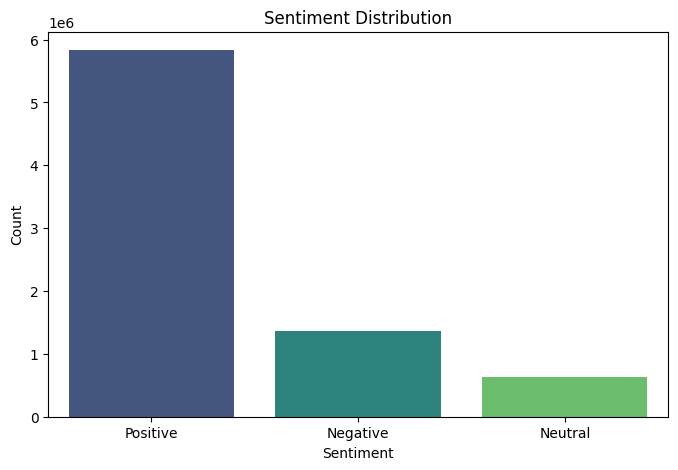

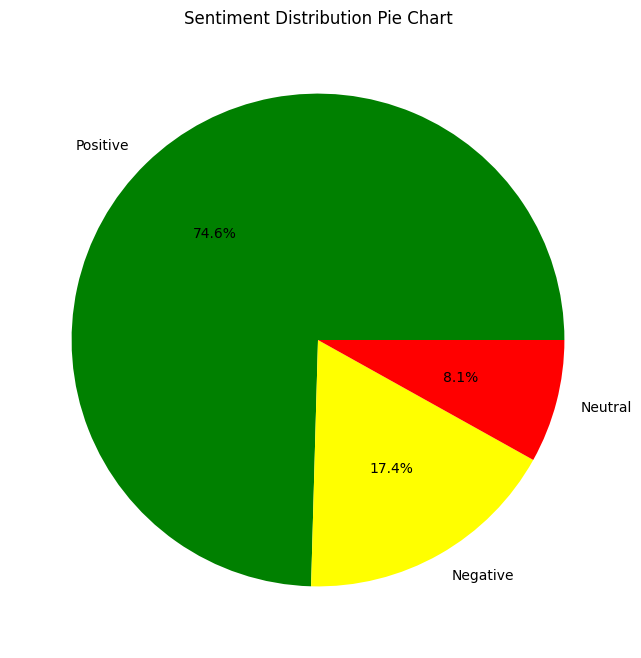

In [22]:
# Sentiment distribution plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'yellow', 'red'])
plt.title('Sentiment Distribution Pie Chart')
plt.ylabel('')
plt.show()

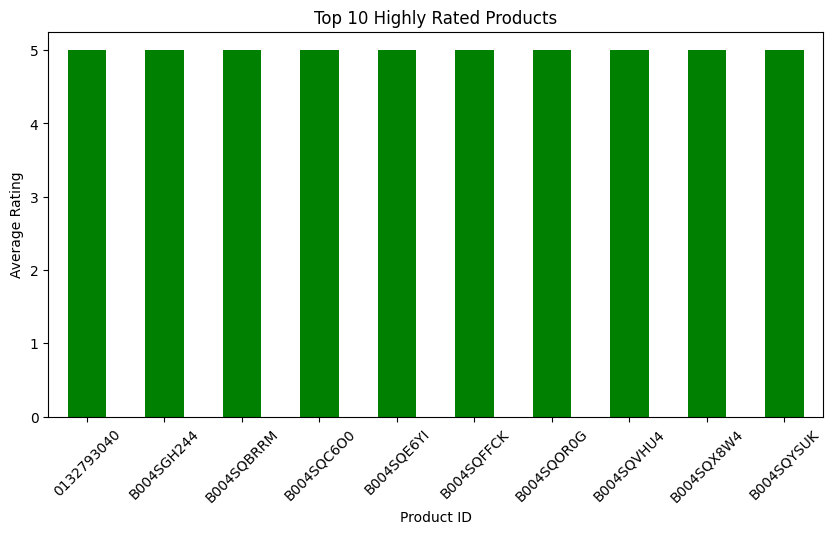

In [11]:
# Top-rated products
top_products = df.groupby('productId')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='green')
plt.title('Top 10 Highly Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

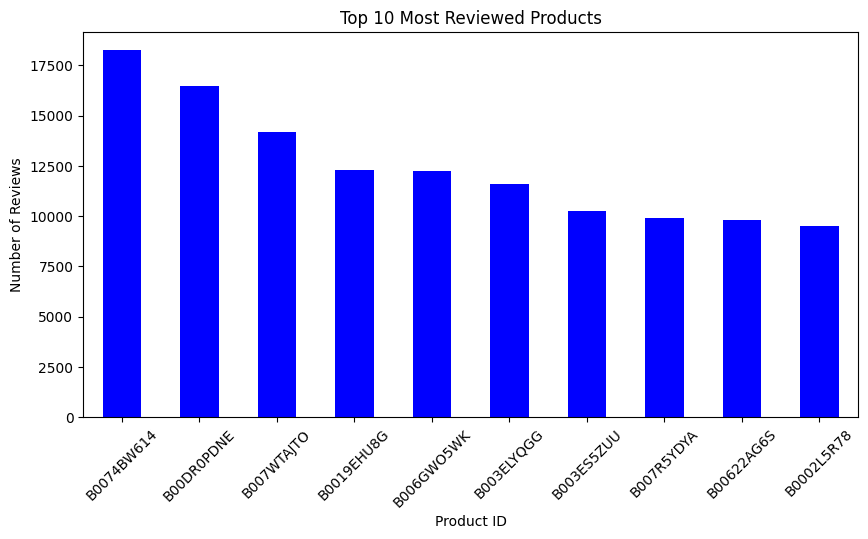

In [12]:
# Most reviewed products
most_reviewed = df['productId'].value_counts().head(10)
plt.figure(figsize=(10,5))
most_reviewed.plot(kind='bar', color='blue')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

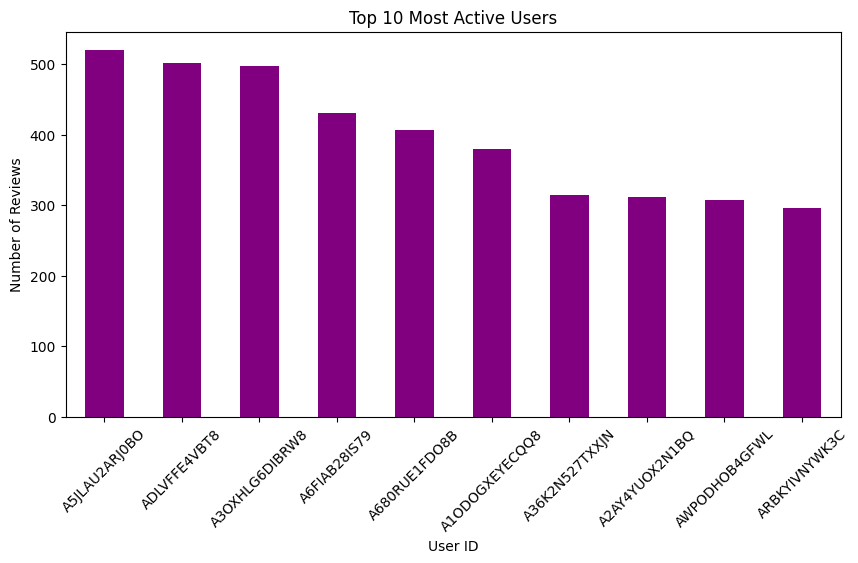

In [14]:
# Most active users
most_active_users = df['userId'].value_counts().head(10)
plt.figure(figsize=(10,5))
most_active_users.plot(kind='bar', color='purple')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_19500\384054930.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('timestamp')['rating'].resample('M').mean().plot(figsize=(12,6), color='red')


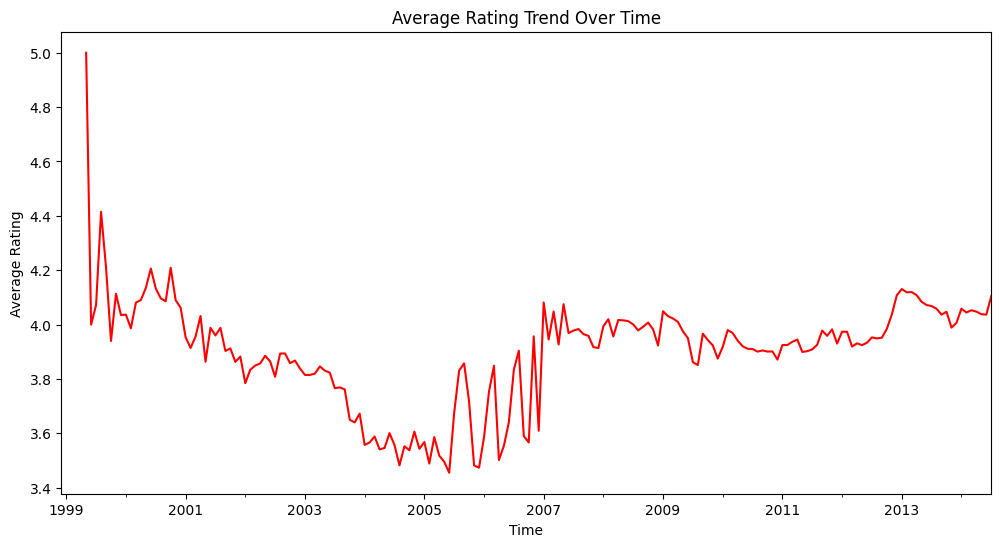

In [15]:
# Rating distribution over time
df.set_index('timestamp')['rating'].resample('M').mean().plot(figsize=(12,6), color='red')
plt.title('Average Rating Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.show()

In [28]:
df.head()

,userId,productId,rating,timestamp,sentiment
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13,Positive
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01,Positive
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29,Negative
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22,Neutral
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18,Negative
